# Named Entity Recognition

#### Extract a random new.

In [5]:
import json

In [6]:
f = open("webhose_apple.json")
json_data=f.readlines()
newsfeeds_apple = []
for line in json_data:
    newsfeeds_apple.append(json.loads(line))
f.close()

In [7]:
text = newsfeeds_apple[106]['text']

In [8]:
print(text)

US President Donald Trump's administration on Tuesday announced investigations into foreign digital services taxes it says are aimed squarely at American tech firms.
Following a similar trade investigation against France last year, the US Trade Representative office now is looking into taxes in Britain and the European Union, as well as Indonesia, Turkey and India.
"President Trump is concerned that many of our trading partners are adopting tax schemes designed to unfairly target our companies," USTR Robert Lighthizer said in a statement.
"We are prepared to take all appropriate action to defend our businesses and workers against any such discrimination."
Washington opposes the efforts to tax revenues from online sales and advertising, saying they single out US tech giants like Google, Apple, Facebook, Amazon and Netflix.
The US and France have agreed to negotiate till the end of the year over a digital services tax Paris approved in 2019, after USTR found them to be discriminating and

#### Extract named entities using spaCy using a pre-trained language model.

In [9]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [10]:
import spacy

In [11]:
nlp = spacy.blank('en')

In [12]:
nlp.analyze_pipes()

{'summary': {}, 'problems': {}, 'attrs': {}}

In [13]:
nlp = spacy.load('en_core_web_sm')

In [14]:
nlp.analyze_pipes()['summary'].keys()

dict_keys(['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])

In [15]:
doc = nlp(text)

In [16]:
doc

US President Donald Trump's administration on Tuesday announced investigations into foreign digital services taxes it says are aimed squarely at American tech firms.
Following a similar trade investigation against France last year, the US Trade Representative office now is looking into taxes in Britain and the European Union, as well as Indonesia, Turkey and India.
"President Trump is concerned that many of our trading partners are adopting tax schemes designed to unfairly target our companies," USTR Robert Lighthizer said in a statement.
"We are prepared to take all appropriate action to defend our businesses and workers against any such discrimination."
Washington opposes the efforts to tax revenues from online sales and advertising, saying they single out US tech giants like Google, Apple, Facebook, Amazon and Netflix.
The US and France have agreed to negotiate till the end of the year over a digital services tax Paris approved in 2019, after USTR found them to be discriminating and

In [17]:
list(doc.sents)

[US President Donald Trump's administration on Tuesday announced investigations into foreign digital services taxes it says are aimed squarely at American tech firms.,
 Following a similar trade investigation against France last year, the US Trade Representative office now is looking into taxes in Britain and the European Union, as well as Indonesia, Turkey and India.,
 "President Trump is concerned that many of our trading partners are adopting tax schemes designed to unfairly target our companies," USTR Robert Lighthizer said in a statement.,
 "We are prepared to take all appropriate action to defend our businesses and workers against any such discrimination.,
 "
 Washington opposes the efforts to tax revenues from online sales and advertising, saying they single out US tech giants like Google, Apple, Facebook, Amazon and Netflix.,
 The US and France have agreed to negotiate till the end of the year over a digital services tax Paris approved in 2019, after USTR found them to be discr

In [18]:
[f'{sentence}' for sentence in doc.sents]

["US President Donald Trump's administration on Tuesday announced investigations into foreign digital services taxes it says are aimed squarely at American tech firms.\n",
 'Following a similar trade investigation against France last year, the US Trade Representative office now is looking into taxes in Britain and the European Union, as well as Indonesia, Turkey and India.\n',
 '"President Trump is concerned that many of our trading partners are adopting tax schemes designed to unfairly target our companies," USTR Robert Lighthizer said in a statement.\n',
 '"We are prepared to take all appropriate action to defend our businesses and workers against any such discrimination.',
 '"\nWashington opposes the efforts to tax revenues from online sales and advertising, saying they single out US tech giants like Google, Apple, Facebook, Amazon and Netflix.\n',
 'The US and France have agreed to negotiate till the end of the year over a digital services tax Paris approved in 2019, after USTR fou

In [19]:
doc.ents

(US,
 Donald Trump,
 Tuesday,
 American,
 France,
 last year,
 the US Trade Representative,
 Britain,
 the European Union,
 Indonesia,
 Turkey,
 India,
 Trump,
 Robert Lighthizer,
 Washington,
 US,
 Google,
 Apple,
 Amazon,
 Netflix,
 US,
 France,
 the end of the year,
 Paris,
 2019,
 USTR,
 up to 100 percent,
 French,
 Trump,
 US,
 2017,
 months,
 China,
 January)

#### Print the named entities in a list and visualize the labeled entities using displaCy. 

In [20]:
[(ent, ent.label_) for ent in doc.ents]

[(US, 'GPE'),
 (Donald Trump, 'PERSON'),
 (Tuesday, 'DATE'),
 (American, 'NORP'),
 (France, 'GPE'),
 (last year, 'DATE'),
 (the US Trade Representative, 'ORG'),
 (Britain, 'GPE'),
 (the European Union, 'ORG'),
 (Indonesia, 'GPE'),
 (Turkey, 'GPE'),
 (India, 'GPE'),
 (Trump, 'PERSON'),
 (Robert Lighthizer, 'PERSON'),
 (Washington, 'GPE'),
 (US, 'GPE'),
 (Google, 'ORG'),
 (Apple, 'ORG'),
 (Amazon, 'ORG'),
 (Netflix, 'GPE'),
 (US, 'GPE'),
 (France, 'GPE'),
 (the end of the year, 'DATE'),
 (Paris, 'GPE'),
 (2019, 'DATE'),
 (USTR, 'ORG'),
 (up to 100 percent, 'PERCENT'),
 (French, 'NORP'),
 (Trump, 'ORG'),
 (US, 'GPE'),
 (2017, 'DATE'),
 (months, 'DATE'),
 (China, 'GPE'),
 (January, 'DATE')]

In [21]:
from spacy import displacy

In [22]:
displacy.render(doc, style='ent')

#### Use API calls to extract Company/Organization and Geo entities from  the article.

In [19]:
#pip install google-cloud-language jupyter_http_over_ws

#### Authenticate with Google Cloud

In [23]:
from google.cloud import language_v1
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('flask-web-app-393318-7d347b6b793b.json')

client = language_v1.LanguageServiceClient(credentials=credentials)

#### Make API Call

In [26]:
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
response = client.analyze_entities(document=document, encoding_type=language_v1.EncodingType.UTF8)

entity_tuples = []

for entity in response.entities:
    if entity.type_ in [language_v1.Entity.Type.ORGANIZATION]:
        entity_tuples.append(('COMPANY/ORGANIZATION', entity.name))
    elif entity.type_ == language_v1.Entity.Type.LOCATION:
        entity_tuples.append(('GEO ENTITY', entity.name))

print(entity_tuples)

[('GEO ENTITY', 'US'), ('COMPANY/ORGANIZATION', 'administration'), ('COMPANY/ORGANIZATION', 'tech firms'), ('COMPANY/ORGANIZATION', 'Washington'), ('COMPANY/ORGANIZATION', 'USTR'), ('COMPANY/ORGANIZATION', 'office'), ('COMPANY/ORGANIZATION', 'France'), ('COMPANY/ORGANIZATION', 'businesses'), ('COMPANY/ORGANIZATION', 'trading partners'), ('COMPANY/ORGANIZATION', 'companies'), ('COMPANY/ORGANIZATION', 'tech giants'), ('GEO ENTITY', 'Turkey'), ('GEO ENTITY', 'Indonesia'), ('COMPANY/ORGANIZATION', 'European Union'), ('GEO ENTITY', 'Britain'), ('GEO ENTITY', 'India'), ('COMPANY/ORGANIZATION', 'Netflix'), ('COMPANY/ORGANIZATION', 'Amazon'), ('COMPANY/ORGANIZATION', 'Apple'), ('COMPANY/ORGANIZATION', 'Google'), ('GEO ENTITY', 'French'), ('COMPANY/ORGANIZATION', 'China'), ('GEO ENTITY', 'Paris')]


#### Train a Model

In [22]:
nlp = spacy.blank('en')

In [23]:
list(doc.sents)

[US President Donald Trump's administration on Tuesday announced investigations into foreign digital services taxes it says are aimed squarely at American tech firms.,
 Following a similar trade investigation against France last year, the US Trade Representative office now is looking into taxes in Britain and the European Union, as well as Indonesia, Turkey and India.,
 "President Trump is concerned that many of our trading partners are adopting tax schemes designed to unfairly target our companies," USTR Robert Lighthizer said in a statement.,
 "We are prepared to take all appropriate action to defend our businesses and workers against any such discrimination.,
 "
 Washington opposes the efforts to tax revenues from online sales and advertising, saying they single out US tech giants like Google, Apple, Facebook, Amazon and Netflix.,
 The US and France have agreed to negotiate till the end of the year over a digital services tax Paris approved in 2019, after USTR found them to be discr

In [24]:
sents = [f'{sentence}' for sentence in doc.sents]

In [25]:
import re

In [26]:
sents[0]

"US President Donald Trump's administration on Tuesday announced investigations into foreign digital services taxes it says are aimed squarely at American tech firms.\n"

In [27]:
re.search(r'US', sents[0])

<re.Match object; span=(0, 2), match='US'>

In [28]:
re.search(r'Donald Trump', sents[0])

<re.Match object; span=(13, 25), match='Donald Trump'>

In [29]:
sents[1]

'Following a similar trade investigation against France last year, the US Trade Representative office now is looking into taxes in Britain and the European Union, as well as Indonesia, Turkey and India.\n'

In [30]:
re.search(r'France', sents[1])

<re.Match object; span=(48, 54), match='France'>

In [31]:
re.search(r'US Trade Representative office', sents[1])

<re.Match object; span=(70, 100), match='US Trade Representative office'>

In [32]:
re.search(r'Britain', sents[1])

<re.Match object; span=(130, 137), match='Britain'>

In [33]:
re.search(r'the European Union', sents[1])

<re.Match object; span=(142, 160), match='the European Union'>

In [34]:
re.search(r'Indonesia', sents[1])

<re.Match object; span=(173, 182), match='Indonesia'>

In [35]:
re.search(r'Turkey', sents[1])

<re.Match object; span=(184, 190), match='Turkey'>

In [36]:
re.search(r'India', sents[1])

<re.Match object; span=(195, 200), match='India'>

In [37]:
sents[2]

'"President Trump is concerned that many of our trading partners are adopting tax schemes designed to unfairly target our companies," USTR Robert Lighthizer said in a statement.\n'

In [38]:
re.search(r'Trump', sents[2])

<re.Match object; span=(11, 16), match='Trump'>

In [39]:
re.search(r'USTR', sents[2])

<re.Match object; span=(133, 137), match='USTR'>

In [40]:
re.search(r'Robert Lighthizer', sents[2])

<re.Match object; span=(138, 155), match='Robert Lighthizer'>

In [41]:
sents[4]

'"\nWashington opposes the efforts to tax revenues from online sales and advertising, saying they single out US tech giants like Google, Apple, Facebook, Amazon and Netflix.\n'

In [42]:
re.search(r'Washington', sents[4])

<re.Match object; span=(2, 12), match='Washington'>

In [43]:
re.search(r'US', sents[4])

<re.Match object; span=(107, 109), match='US'>

In [44]:
re.search(r'Google', sents[4])

<re.Match object; span=(127, 133), match='Google'>

In [45]:
re.search(r'Apple', sents[4])

<re.Match object; span=(135, 140), match='Apple'>

In [46]:
re.search(r'Facebook', sents[4])

<re.Match object; span=(142, 150), match='Facebook'>

In [47]:
re.search(r'Amazon', sents[4])

<re.Match object; span=(152, 158), match='Amazon'>

In [48]:
re.search(r'Netflix', sents[4])

<re.Match object; span=(163, 170), match='Netflix'>

In [49]:
sents[5]

'The US and France have agreed to negotiate till the end of the year over a digital services tax Paris approved in 2019, after USTR found them to be discriminating and threatened retaliatory duties of up to 100 percent on French imports such as champagne and camembert cheese.\n'

In [50]:
re.search(r'US', sents[5])

<re.Match object; span=(4, 6), match='US'>

In [51]:
re.search(r'France', sents[5])

<re.Match object; span=(11, 17), match='France'>

In [52]:
re.search(r'Paris', sents[5])

<re.Match object; span=(96, 101), match='Paris'>

In [53]:
re.search(r'USTR', sents[5])

<re.Match object; span=(126, 130), match='USTR'>

In [54]:
sents[6]

'Trump has embroiled the US in numerous trade disputes since taking office in 2017, including a months-long trade war with China that cooled with the signing of a partial deal in January.'

In [55]:
re.search(r'Trump', sents[6])

<re.Match object; span=(0, 5), match='Trump'>

In [56]:
re.search(r'US', sents[6])

<re.Match object; span=(24, 26), match='US'>

In [57]:
re.search(r'China', sents[6])

<re.Match object; span=(122, 127), match='China'>

In [58]:
TRAIN_DATA = [
    (sents[0], {'entities': [(0, 2, "GPE"),(13, 25, "PERSON")]}),
    (sents[1], {'entities': [(48, 54, "GPE"),(66, 100, "ORG"),(130, 137, "GPE"),(142, 160, "ORG"),(173, 182, "GPE"),(184, 190, "GPE"),(195, 200, "GPE")]}),
    (sents[2], {'entities': [(11, 16, "PERSON"),(138, 155, "PERSON"),(133, 137, "ORG")]}),
    (sents[4], {'entities': [(2, 12, "GPE"),(107, 109, "GPE"),(127, 133, "ORG"),(135, 140, "ORG"),(142, 150, "ORG"),(152, 158, "ORG"),(163, 170, "ORG")]}),
    (sents[5], {'entities': [(4, 6, "GPE"),(11, 17, "GPE"),(96, 101, "GPE"),(126, 130, "ORG")]}),
    (sents[6], {'entities': [(0, 5, "PERSON"),(24, 26, "GPE"),(122, 127, "GPE")]}),
]

#### Train a blank SpaCy nlp pipeline using the TRAIN_DATA

In [59]:
ner = nlp.add_pipe('ner', last=True)

In [60]:
nlp.analyze_pipes()['summary']

{'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
  'requires': [],
  'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
  'retokenizes': False}}

In [61]:
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

In [62]:
from spacy.training import Example

In [63]:
n_iter = 100
loss_history=[]
with nlp.select_pipes(enable=["ner"]):
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        losses = {}
        texts, annotations = zip(*TRAIN_DATA)
        examples = []
        for i in range(len(texts)):
            doc = nlp.make_doc(texts[i])
            example = Example.from_dict(doc, annotations[i])
            examples.append(example)
        nlp.update(examples, drop=0.5, losses=losses, sgd=optimizer)
        loss_history.append(losses['ner'])

In [64]:
import matplotlib.pyplot as plt

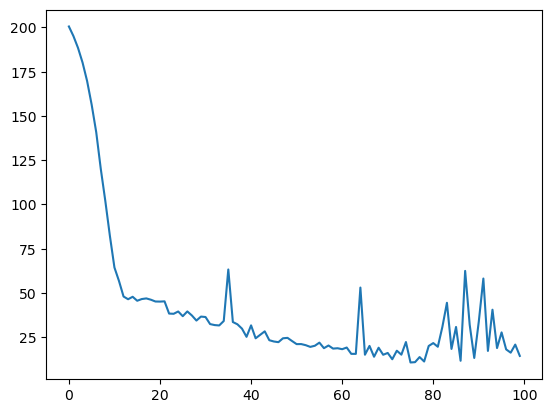

In [65]:
plt.plot(loss_history)

#### Use trained nlp to test entity recognition on an article. 

In [66]:
text = newsfeeds_apple[4390]['text']
text

'1 hour ago Technology Yahoo Tech 36 The same day Donald Trump took to Twitter to threaten to regulate or shut down social media sites, the U.S. appeals court in Washington, D.C. dismissed a lawsuit accusing top tech companies of silencing conservative voices. Filed in 2018 by nonprofit Freedom Watch and right-wing gadfly Laura Loomer, the suit accused Apple, Facebook, Twitter and Google of stifling First Amendment rights.'

In [67]:
doc = nlp(text)

In [68]:
[(ent, ent.label_) for ent in doc.ents]

[(Technology, 'ORG'),
 (Yahoo, 'PERSON'),
 (Donald Trump, 'PERSON'),
 (the U.S. appeals court, 'ORG'),
 (Washington, 'GPE'),
 (D.C., 'GPE'),
 (Filed, 'GPE'),
 (Loomer, 'GPE'),
 (the, 'GPE'),
 (Apple, 'ORG'),
 (Facebook, 'ORG'),
 (Twitter, 'ORG'),
 (Google, 'ORG')]

In [69]:
displacy.render(doc, style='ent')